In [11]:
import TokenClassificationTrainer
import utils
import numpy as np
from evaluate import load as load_metric

## import the confusions matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns

In [4]:
task = "ner"
model_name = "xlm-mlm-17-1280"  # "bert-base-multilingual-cased" or "xlm-mlm-17-1280"
seed = 79002
save_name = 'baseline'+ ".seed-" + str(seed)
batch_size = 32


test_trainer = TokenClassificationTrainer.TokenClassificationTrainer(task=task, model_name=model_name, save_name=save_name, batch_size=batch_size, label_all_tokens=True, file_paths={"train" : "data/datasets/ewt/en_ewt_nn_train_newsgroup_and_weblogs.conll", "validation" : "data/datasets/NoSta-D/NER-de-train.tsv"})
test_trainer.set_trainer(use_old = True)

In [5]:
names=[
                    "O",
                    "B-PER",
                    "I-PER",
                    "B-ORG",
                    "I-ORG",
                    "B-LOC",
                    "I-LOC",
                    "B-MISC",
                    "I-MISC"
]

metric = load_metric("seqeval")


In [6]:
# get the saved model and make predictions
predictions, labels = test_trainer.predict("data/datasets/ewt/en_ewt_nn_test_newsgroup_and_weblogs.conll")
predictions = np.argmax(predictions, axis=2)

true_predictions = [
    [names[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

true_labels = [
    [names[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

results = metric.compute(predictions=true_predictions, references=true_labels)
results
    

100%|██████████| 16/16 [00:52<00:00,  3.29s/it]                


{'LOC': {'precision': 0.536036036036036,
  'recall': 0.5288888888888889,
  'f1': 0.5324384787472035,
  'number': 225},
 'MISC': {'precision': 0.16326530612244897,
  'recall': 0.07339449541284404,
  'f1': 0.10126582278481013,
  'number': 218},
 'ORG': {'precision': 0.36548223350253806,
  'recall': 0.2857142857142857,
  'f1': 0.32071269487750553,
  'number': 252},
 'PER': {'precision': 0.4861111111111111,
  'recall': 0.30701754385964913,
  'f1': 0.3763440860215054,
  'number': 342},
 'overall_precision': 0.4256480218281037,
 'overall_recall': 0.3008678881388621,
 'overall_f1': 0.3525423728813559,
 'overall_accuracy': 0.8639489194499018}

In [7]:
true_p_f = [pred for preds in true_predictions for pred in preds]
true_l_f = [pred for preds in true_labels for pred in preds]

In [8]:
conf_mat = confusion_matrix(true_l_f, true_p_f, labels=names, normalize = 'true')


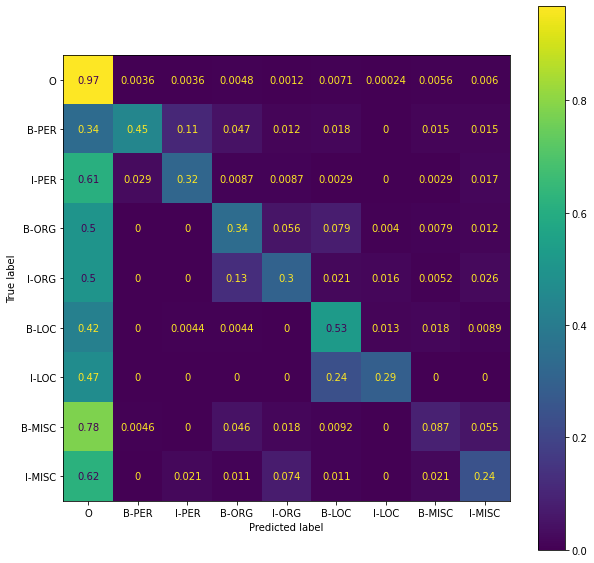

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(conf_mat)

disp.plot(ax = plt.gca())
ax.set_xticks(range(len(names)),names)
ax.set_yticks(range(len(names)),names)

plt.show()

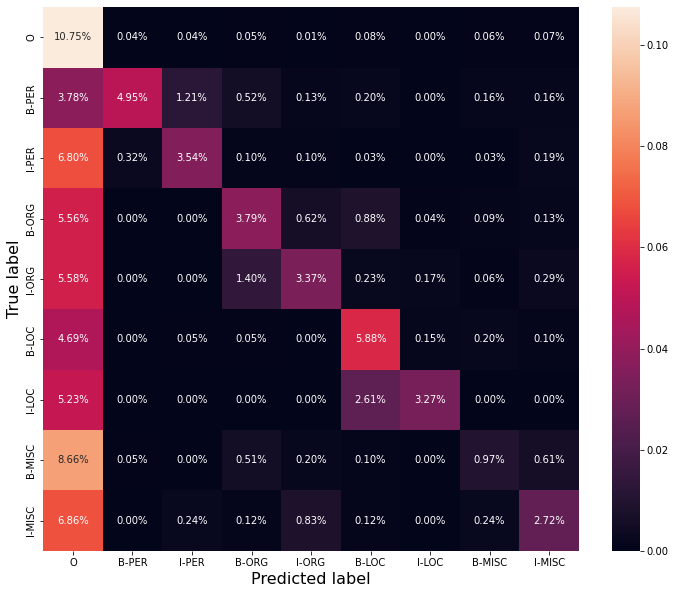

In [34]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(conf_mat/np.sum(conf_mat), ax=ax, annot=True, fmt='.2%', xticklabels=names, yticklabels=names)
ax.set_xlabel('Predicted label', fontsize=16)
ax.set_ylabel('True label', fontsize=16)
plt.show()